# Logistic regression

Compare LR, MLP anf SVM as the last model.

In [141]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn import svm
from imblearn.over_sampling import ADASYN 

In [143]:
#load all 1000 preditctions
bodies = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\bodies.csv")
bodieswS = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\\4000\bodieswS.csv")
subs = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\subs.csv")
W2v= pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\W2v.csv")
W2vwS = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\W2vwS.csv")
bodieswSdrop = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\bodieswSdrop.csv")
bodiesdrop1 = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\bodiesdrop_ensemble_e15.csv")
bodiesdrop2 = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\bodieswSdrop_ensemble_e15.csv")
bodiesdrop3 = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\bodiesdrop_ensemble_e3.csv")
subs1 = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\subs_ensemble_e15.csv")
subs2  = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\subsDrop_ensemble_e10.csv")
subs3  = pd.read_csv(r"Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\subsDrop_ensemble_e4.csv")

In [144]:
df = pd.DataFrame({"true_y":bodiesdrop1["true_y"].tolist(), "bodies_y":bodies["pred_y"].tolist(), "bodieswS_y": bodieswS["pred_y"].tolist(), "subs_y": subs["pred_y"].tolist(), "W2v_y": W2v["pred_y"].tolist(), "W2vwS_y": W2vwS["pred_y"].tolist(), "bodieswSdrop_y":bodieswSdrop["pred_y"].tolist(), "subs1_y": subs1["gender"].tolist(),"subs2_y":  subs2["pred_y"].tolist(), "subs3_y":  subs3["gender"].tolist(), "bodiesdrop1_y": bodiesdrop1["gender"].tolist(), "bodiesdrop2_y": bodiesdrop2["gender"].tolist(),"bodiesdrop3_y": bodiesdrop3["gender"].tolist()  })
print(df.head(5))

   true_y  bodies_y  bodieswS_y    subs_y     W2v_y   W2vwS_y  bodieswSdrop_y  \
0       0  0.094856    0.120936  0.193810  0.093180  0.060750        0.046726   
1       1  0.106738    0.099757  0.478376  0.178994  0.149258        0.044623   
2       0  0.549541    0.253948  0.338182  0.892713  0.913806        0.222466   
3       1  0.425894    0.838085  0.374291  0.856181  0.820273        0.900915   
4       0  0.553865    0.341898  0.284349  0.461019  0.478457        0.525452   

    subs1_y   subs2_y   subs3_y  bodiesdrop1_y  bodiesdrop2_y  bodiesdrop3_y  
0  0.000117  0.092312  0.028779       0.932781       0.043334       0.087884  
1  0.203652  0.567870  0.614227       0.990765       0.000558       0.089228  
2  0.002768  0.027433  0.292234       0.030106       0.276596       0.247074  
3  0.504980  0.653584  0.312290       0.994710       0.999636       0.372952  
4  0.000512  0.022220  0.310831       0.979841       0.938383       0.584331  


In [145]:
print("bodies \n",  bodies.head(10), "\n","bodieswS \n",  bodieswS.head(10), "\n","subs \n",  subs.head(10), "\n", "W2v \n",  W2v.head(10), "\n", "W2vwS \n",  W2vwS.head(10), "\n", "bodieswSdrop \n",  bodieswSdrop.head(10), "\n","subs1_y \n", subs1.head(10),"\n subs2_y \n", subs2.head(10),"\n subs3_y \n", subs3.head(10), " \n bodiesdrop1_y \n", bodiesdrop1.head(10), "\n bodieswSdrop2_y \n" ,  bodiesdrop2.head(10), "\n bodieswSdrop3_y \n" ,  bodiesdrop3.head(10)  )

bodies 
               author    pred_y  true_y
0           -evasian  0.094856       0
1            -rubiks  0.106738       1
2           00708070  0.549541       0
3            0200008  0.425894       1
4         11235813__  0.553865       0
5            12sea21  0.038997       0
6               1482  0.132953       0
7             17to85  0.043001       0
8  19941611811914919  0.505905       1
9          2ndXCharm  0.044959       1 
 bodieswS 
               author    pred_y  true_y
0           -evasian  0.120936       0
1            -rubiks  0.099757       1
2           00708070  0.253948       0
3            0200008  0.838085       1
4         11235813__  0.341898       0
5            12sea21  0.036149       0
6               1482  0.284715       0
7             17to85  0.043989       0
8  19941611811914919  0.470839       1
9          2ndXCharm  0.056165       1 
 subs 
               author    pred_y  true_y
0           -evasian  0.193810       0
1            -rubiks  0.478376   

In [146]:
# select best columns based on validation(need some trial and error)
X = df.loc[:, ["bodieswSdrop_y", "subs_y", "W2v_y"]]  # "bodieswSdrop_y", "subs_y", "W2v_y"  #, "subs_y", "W2v_y"
print(X.head(5))
y = df.true_y

   bodieswSdrop_y    subs_y     W2v_y
0        0.046726  0.193810  0.093180
1        0.044623  0.478376  0.178994
2        0.222466  0.338182  0.892713
3        0.900915  0.374291  0.856181
4        0.525452  0.284349  0.461019


In [147]:
SEED = 2002 #2000


x_train , x_validation, y_train , y_validation = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# balamce classes with adasyn
sm = ADASYN()
print("len(x_train) before adasyn: ",len(x_train), "len(y_train) before adasyn:", len(y_train), "percentage before: ", sum(y_train.tolist())/len(y_train.tolist()))
x_train, y_train = sm.fit_sample(x_train, y_train)
print("len(x_train) after adasyn: ",len(x_train), "len(y_train) after adasyn:", len(y_train), "percentage after: ", sum(y_train.tolist())/len(y_train.tolist()))
sum(y_validation.tolist())/len(y_validation.tolist())




lrClf = LogisticRegression(C = 1)   #class_weight = { 1: 1./0.2698 , 0 : 1./(1.-0.2698)}  { 1: 1./0.265 , 0 : 1./(1.-0.265)}

kf = KFold(n_splits = 10)          #Kfold percross-validation

for train_indices, test_indices in kf.split(x_train):   
    lrClf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print(lrClf.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    
y_scoreLR = lrClf.predict_proba(x_validation)[:,1]
print(y_scoreLR[:10])

0.9125
0.8875
0.9
0.925
0.925
0.875
0.875
0.9
0.95
0.875
[0.02772196 0.09115469 0.06507053 0.26935453 0.06629544 0.97666296
 0.02866282 0.04250269 0.0721337  0.3445557 ]


0.265


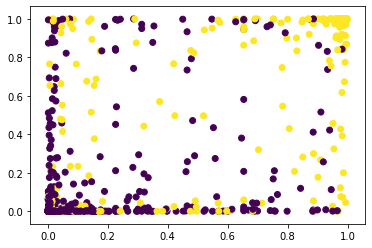

In [148]:
print(sum(y_validation.tolist())/len(y_validation.tolist()))
plt.scatter(df.subs2_y.tolist(),df.bodiesdrop2_y.tolist() , c = y.tolist() )

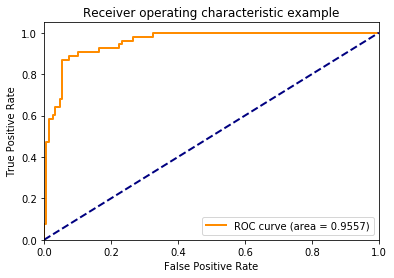

In [149]:
fpr, tpr, thresholds = roc_curve(y_validation, y_scoreLR)
roc_auc = auc(fpr, tpr) 


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [150]:

X = X.to_numpy()
y = y.to_numpy()

x_train , x_validation, y_train , y_validation = train_test_split(X, y, test_size = 0.2, random_state = SEED)
mlpClf = MLPClassifier(solver = 'adam', activation= 'relu' ,alpha = 0.02, verbose = False, early_stopping = True,
                     learning_rate = 'invscaling', max_iter = 400)
print("number of females in validation = ", sum([1 if y == 1 else 0 for y in y_validation ]))
#print(x_train.head(5))
# Cross validation - 10 Fold 
kf = KFold(n_splits = 10)

for train_indices, test_indices in kf.split(x_train):
    mlpClf.fit(x_train[train_indices], y_train[train_indices])
    print(mlpClf.score(x_train[test_indices], y_train[test_indices]))
y_scoreMPL = mlpClf.predict_proba(x_validation)[:,1]

number of females in validation =  53
0.8625
0.9125
0.825
0.9375
0.8875
0.85
0.8125
0.875
0.9125
0.85


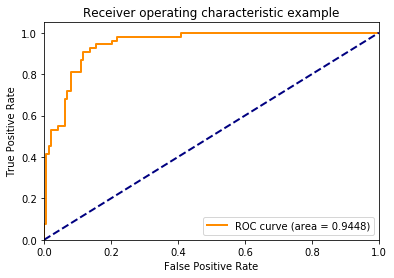

In [152]:
fpr, tpr, thresholds = roc_curve(y_validation, y_scoreMPL)
roc_auc = auc(fpr, tpr) 


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [153]:
svm = svm.SVC(C=1.0, kernel='poly', degree=2, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1,
               decision_function_shape='ovr', break_ties=False, random_state=None)
              
kf = KFold(n_splits = 10)

for train_indices, test_indices in kf.split(x_train):
    svm.fit(x_train[train_indices], y_train[train_indices])
    print(svm.score(x_train[test_indices], y_train[test_indices]))
y_scoreSVM = svm.predict_proba(x_validation)[:,1]

0.8875
0.875
0.9
0.9375
0.95
0.875
0.875
0.8875
0.925
0.875


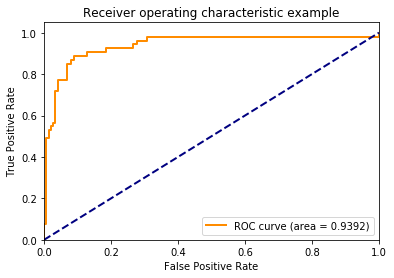

In [154]:
fpr, tpr, thresholds = roc_curve(y_validation, y_scoreSVM)
roc_auc = auc(fpr, tpr) 


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()